                 date                 user  \
0 2025-05-18 09:01:05  1717823424179867648   
1 2025-05-17 17:25:57  1753366155660550144   
2 2025-05-16 17:24:14   765177385545269248   
3 2025-05-16 14:15:53  1563181541529772033   
4 2025-05-16 14:10:30            517594178   

                                                text  \
0  @RURA_RWANDA @CityofKigali Rwanda Rolls Out Di...   
1  @brucenahabwe1 @SeraTheActivist But transport ...   
2  RT @_Yanoh: The way Kagame talks you wouldn't ...   
3  RT @_Yanoh: The way Kagame talks you wouldn't ...   
4  RT @_Yanoh: The way Kagame talks you wouldn't ...   

                                     translated_text lang sentiment  
0  @RURA_RWANDA @CityofKigali Rwanda Rolls Out Di...   en   Neutral  
1  @brucenahabwe1 @SeraTheActivist But transport ...   en  Positive  
2  RT @_Yanoh: The way Kagame talks you wouldn't ...   en  Negative  
3  RT @_Yanoh: The way Kagame talks you wouldn't ...   en  Negative  
4  RT @_Yanoh: The way Kagame talks 

<Figure size 1000x600 with 0 Axes>

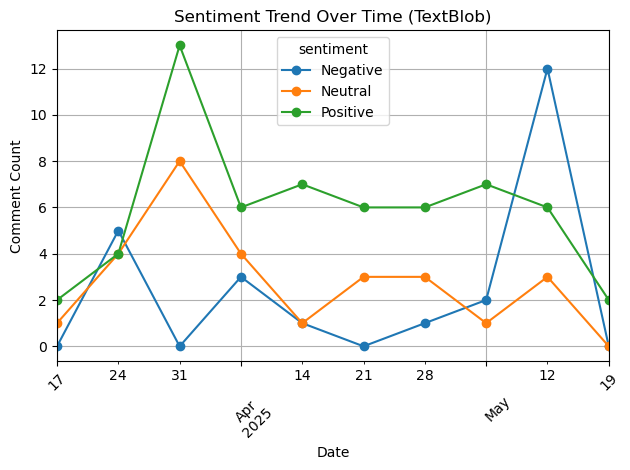

In [11]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
df = pd.read_csv("../data/combined_sentiment_dataset.csv")

# Apply sentiment analysis using translated text
def classify_sentiment_blob(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# If sentiment hasn't already been applied
if "sentiment" not in df.columns:
    df["sentiment"] = df["translated_text"].apply(classify_sentiment_blob)

# Parse date and remove timezone info
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

# Group by week and sentiment
sentiment_over_time = (
    df.groupby([df["date"].dt.to_period("W"), "sentiment"])
    .size()
    .unstack(fill_value=0)
)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

# OPTIONAL: Preview the processed data
print(df.head())

# Plot sentiment trend
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time (TextBlob)")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='date'>

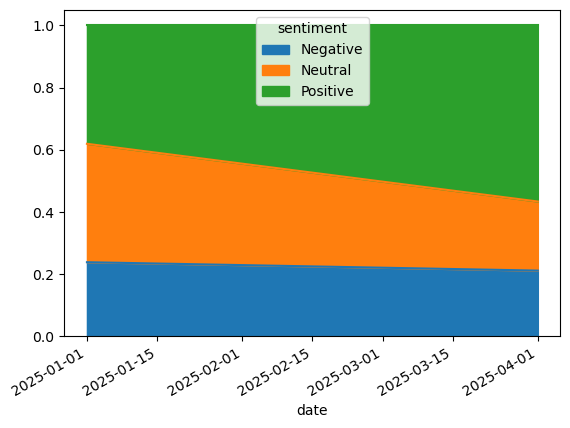

In [12]:
sentiment_percentages.plot.area()


<Axes: xlabel='date'>

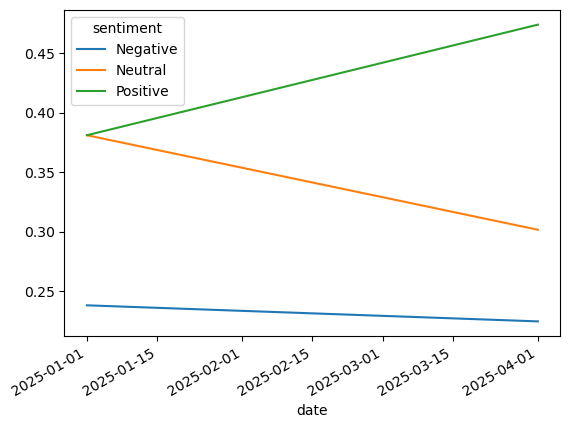

In [13]:
sentiment_percentages.rolling(window=3, min_periods=1).mean().plot()


<Axes: xlabel='date'>

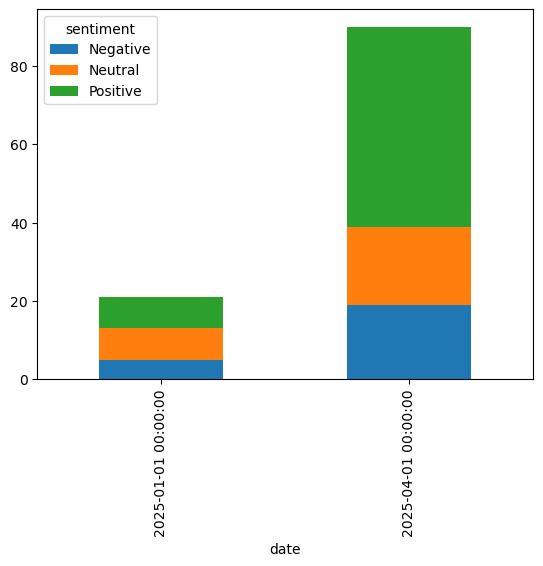

In [14]:
sentiment_counts.plot(kind='bar', stacked=True)


In [23]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='date', ylabel='sentiment'>

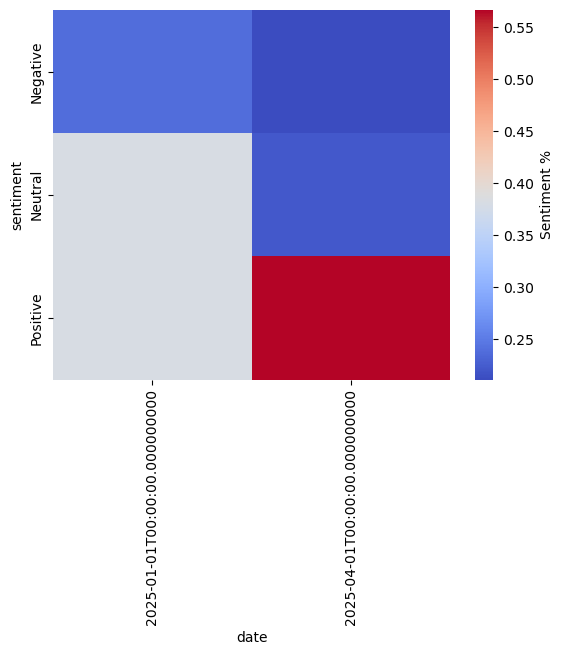

In [25]:
import seaborn as sns
sns.heatmap(sentiment_percentages.T, cmap="coolwarm", cbar_kws={'label': 'Sentiment %'})


In [24]:
import seaborn as sns
print(sns.__version__)


0.13.2


<Figure size 1000x600 with 0 Axes>

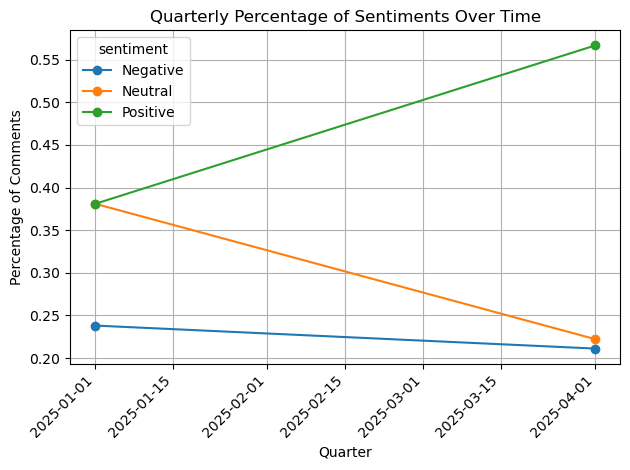

In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("../data/combined_sentiment_dataset.csv")

# Ensure date is datetime and remove timezone info
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

# Compute polarity for translated text
df["polarity"] = df["translated_text"].apply(lambda t: TextBlob(str(t)).sentiment.polarity)

# Classify sentiment from polarity
def classify_sentiment_blob(polarity):
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(classify_sentiment_blob)

## Group by quarter and sentiment
sentiment_counts = (
    df.groupby([df["date"].dt.to_period("Q"), "sentiment"])
    .size()
    .unstack(fill_value=0)
)
sentiment_counts.index = sentiment_counts.index.to_timestamp()

# Convert to percentages
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

# Plot quarterly sentiment trend
plt.figure(figsize=(10, 6))
sentiment_percentages.plot(marker='o')
plt.title("Quarterly Percentage of Sentiments Over Time")
plt.xlabel("Quarter")
plt.ylabel("Percentage of Comments")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




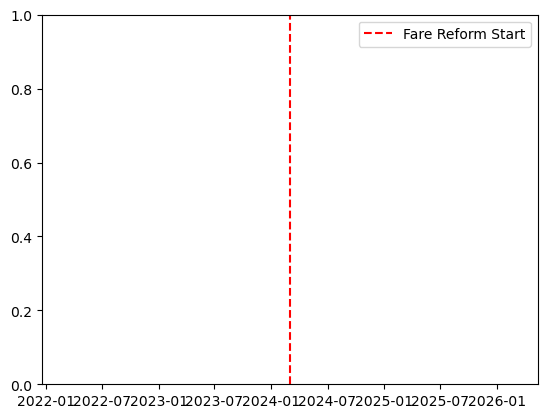

In [8]:
plt.axvline(pd.Timestamp("2024-03-01"), color='red', linestyle='--', label='Fare Reform Start')
plt.legend()


<Axes: xlabel='date'>

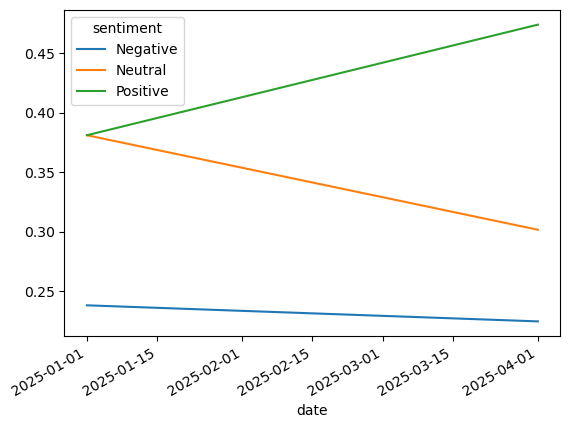

In [9]:
sentiment_percentages.rolling(window=3, min_periods=1).mean().plot()


In [44]:
# ====================================
# FareReformInsights – Sentiment Analysis Script
# ====================================

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# ------------------------------------
# 1. Load Dataset
# ------------------------------------
df = pd.read_csv("../data/combined_sentiment_dataset.csv")
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

# ------------------------------------
# 2. Sentiment Analysis using TextBlob
# ------------------------------------
def classify_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["translated_text"].apply(classify_sentiment)

# ------------------------------------
# 3. Subjectivity Score & Flagging
# ------------------------------------
df["subjectivity"] = df["translated_text"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
df["flagged"] = df["subjectivity"] > 0.85  # High subjectivity = potentially emotional/misleading

# OPTIONAL: Preview flagged comments
print("Flagged (high subjectivity) examples:")
print(df[df["flagged"]][["date", "translated_text", "subjectivity"]].head())


Flagged (high subjectivity) examples:
                  date                                    translated_text  \
16 2025-05-19 06:24:55   Moto-taxi fares remain unchanged — is that fair?   
26 2025-04-28 06:24:55  I support RURA's reform; distance-based pricin...   
32 2025-04-20 06:24:55   Moto-taxi fares remain unchanged — is that fair?   
35 2025-04-02 06:24:55   Moto-taxi fares remain unchanged — is that fair?   
36 2025-05-08 06:24:55  I support RURA's reform; distance-based pricin...   

    subjectivity  
16           0.9  
26           0.9  
32           0.9  
35           0.9  
36           0.9  


In [28]:
from textblob import TextBlob

# Compute subjectivity score from translated text
df["subjectivity"] = df["translated_text"].apply(
    lambda x: TextBlob(str(x)).sentiment.subjectivity
)


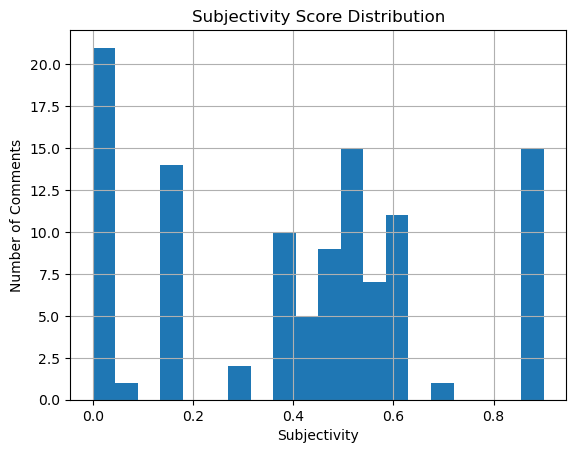

In [29]:
df["subjectivity"].hist(bins=20)
plt.title("Subjectivity Score Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Number of Comments")
plt.show()


<Figure size 1000x600 with 0 Axes>

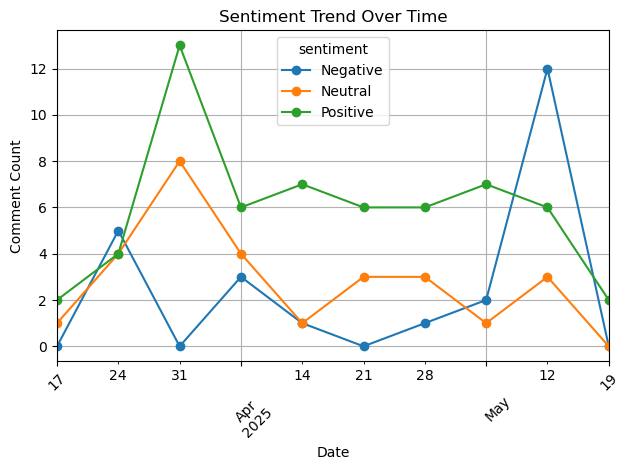

In [45]:
# ------------------------------------
# 4. Sentiment Trend Over Time
# ------------------------------------
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

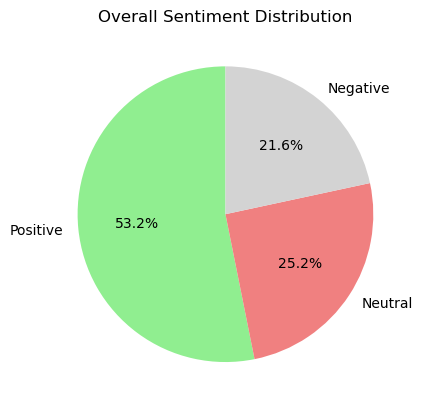

In [46]:

# ------------------------------------
# 5. Sentiment Distribution Pie Chart
# ------------------------------------
df["sentiment"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'lightgrey']
)
plt.title("Overall Sentiment Distribution")
plt.ylabel('')
plt.show()


In [36]:
!pip install wordcloud nltk

In [48]:
# !pip show wordcloud

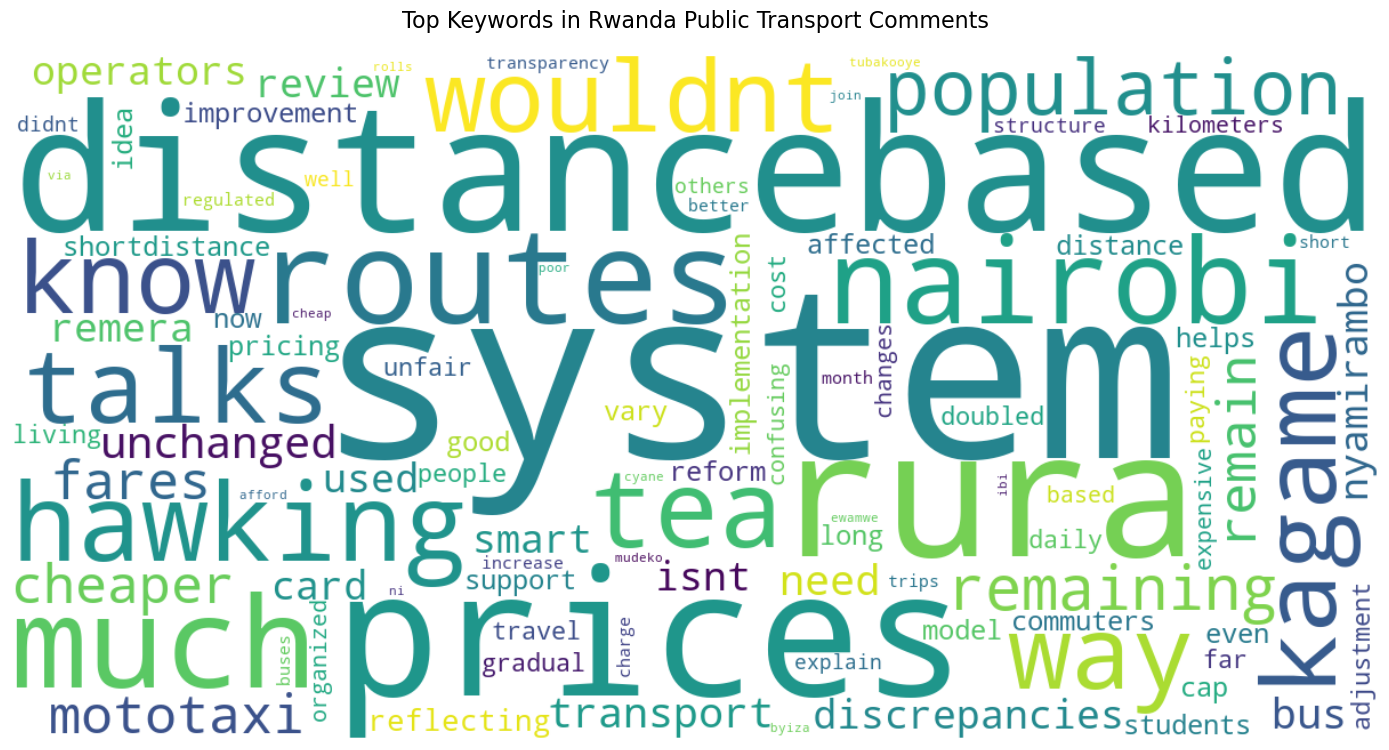

In [46]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # <-- Explicit import

# Custom stop words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "rt", "https", "t", "co", "rwanda", "public", "fare", "city",
    "kigali", "kololo", "whole", "potholes", "consider","new","half",
    "preeminent", "diplomatic","fair"
])

def clean_text(text):
    """Enhanced text cleaning with regex."""
    if not isinstance(text, str):
        return ""  # Handle NaN/non-string entries
    text = re.sub(r"http\S+|@\w+", "", text)  # Remove URLs/mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # Keep only letters/spaces
    return text.lower().strip()               # Lowercase + trim whitespace

# Generate corpus (with NaN handling)
text_corpus = ' '.join(df["text"].dropna().apply(clean_text).tolist())

# Configure WordCloud
wc = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=custom_stopwords,
    max_words=150,                # Increased word count
    collocations=False,           # Avoid word pairs (e.g., "city fare")
    colormap='viridis',           # Better color scheme
    contour_width=2,
    contour_color='steelblue'
).generate(text_corpus)

# Plot with professional styling
plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Top Keywords in Rwanda Public Transport Comments", pad=20, fontsize=16)
plt.tight_layout()
plt.show()

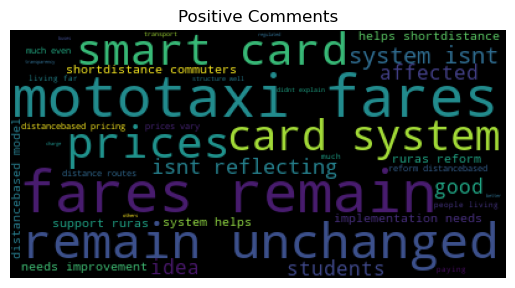

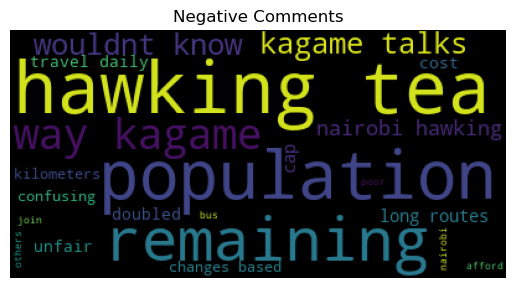

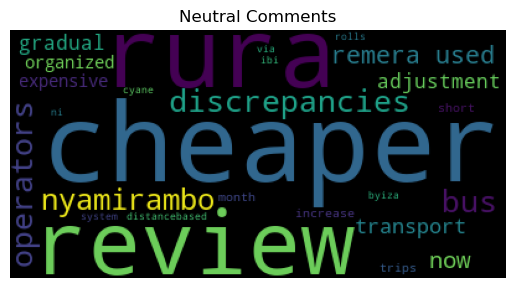

In [47]:
for sentiment in ["Positive", "Negative", "Neutral"]:
    subset = df[df["sentiment"] == sentiment]
    text = ' '.join(subset["text"].dropna().apply(clean_text))
    wc = WordCloud(stopwords=custom_stopwords).generate(text)
    plt.figure()
    plt.imshow(wc)
    plt.title(f"{sentiment} Comments")
    plt.axis("off")
    plt.show()

In [48]:

# ------------------------------------
# 7. Sample Comments & Flags
# ------------------------------------
print("\n🔹 Top 3 Positive Comments:")
print(df[df["sentiment"] == "Positive"]["text"].head(3).to_string(index=False))

print("\n🔸 Top 3 Negative Comments:")
print(df[df["sentiment"] == "Negative"]["text"].head(3).to_string(index=False))

print("\n⚠️ Flagged Comments with High Subjectivity:")
print(df[df["flagged"]][["date", "text"]].to_string(index=False))



🔹 Top 3 Positive Comments:
@brucenahabwe1 @SeraTheActivist But transport f...
  They didn’t explain the new fare structure well.
Transport is better regulated, but we need tran...

🔸 Top 3 Negative Comments:
RT @_Yanoh: The way Kagame talks you wouldn't k...
RT @_Yanoh: The way Kagame talks you wouldn't k...
RT @_Yanoh: The way Kagame talks you wouldn't k...

⚠️ Flagged Comments with High Subjectivity:
               date                                                     text
2025-05-19 06:24:55         Moto-taxi fares remain unchanged — is that fair?
2025-04-28 06:24:55 I support RURA's reform; distance-based pricing is fair.
2025-04-20 06:24:55         Moto-taxi fares remain unchanged — is that fair?
2025-04-02 06:24:55         Moto-taxi fares remain unchanged — is that fair?
2025-05-08 06:24:55 I support RURA's reform; distance-based pricing is fair.
2025-04-20 06:24:55 I support RURA's reform; distance-based pricing is fair.
2025-04-06 06:24:55         Moto-taxi fares remain unc